<i>Status: Draft</i>

<hr/>

#### Dependencies

Note there are a number of extra libraries that need to be installed in order to undertake machine learning with graphs. Many of the packages seem to be under active development so take care. These include:

1. node2vec
2. karateclub
3. stellargraph
4. GEM
5. SNAP

To install node2vec, karateclub, and SNAP run the following in a jupyter cell:

<code>!pip install node2vec</code>

<code>!pip install karateclub</code>

<code>!pip install snap-stanford </code>

To install stellagraph, run the following from the command line: 

1. <code>git clone https://github.com/stellargraph/stellargraph.git </code>
2. <code>cd stellargraph</code>
3. <code>run pip install .</code> 

Note that this may create an error as for some reason stellargraph lists python version as <= 3.9 in setup.py. If you are using a later version, just edit the setup.py and remove this. 

To install gem, run the following from the command line: 

1. <code>git clone https://github.com/palash1992/GEM.git</code>
2. <code>cd to GEM folder</code>
3. <code>run pip install . </code>

<hr/>

In [4]:
import networkx as nx
import networkx.algorithms.community as nx_comm
import matplotlib.pyplot as plt
import numpy as np
import scipy as scp
import pandas as pd
import node2vec as n2v
import karateclub as kc
import random
import stellargraph as sp
from IPython.display import Image
from gem.embedding.gf import GraphFactorization
from pathlib import Path
Path("gem/intermediate").mkdir(parents=True, exist_ok=True)
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

### Overview 

This series of notebooks covers the basics of Graph Machine Learning. This includes:

- G0: Standard Graph ML Libraries and installation, basic definitions, and basics or working with networkx
- G1: Graph Metrics
- G2: Graph types and sourcing data sets
- G3: Embedding Algorithms
- G4: Supervised Graph Learning

<hr/>

<b>Aim</b>: Provide basic definitions

<hr/>

<b>Definition</b>: A <b>node</b> is a point in a space where that space has not been defined (i.e is not specified as Euclidian, Hyperbolic, etc). Also called a vertice.

<b>Definition</b>: An <b>edge</b> is a a line joining in 2 nodes or a node to itself. Also called a link. An edge may have an arrow at its end leading into a node and graphs with these types of graphs are called <b>directed</b>. For graphs where the edges do not have arrows, they are called <b>undirected</b>.

<b>Definition</b>: A <b>graph </b> is a any amount of nodes, where those nodes may or may not be joined using edges. 

<b>Definition</b>: The <b>order</b> of a graph is the count of vertices or nodes

<b>Definition</b>: The <b>size</b> of a graph is the count of edges

<b>Definition</b>: The <b>degree</b> of a node is the count of edges/links adjacent to it

<b>Definition</b>: An <b>Adjacency Matrix</b> can be used as a matrix where all nodes are represented that can be linked. 

<b>Definition</b>: An <b>Ego Graph</b> is the graph of all nodes that are less than a certain distance from the tensorflow node. 

<hr/>

<b>Aim</b>: Explore graphs in the context of the networkx library

<hr/>

<b>Let</b> G be a graph composed of nodes $V$ and edges $E$

In [6]:
G = nx.Graph()

V = {' Dublin', 'Paris', 'Milan', 'Rome'}
E = [(' Milan','Dublin'), (' Milan','Paris'),
     (' Paris','Dublin'),(' Milan','Rome')]

G.add_nodes_from(V)
G.add_edges_from(E)

<b>Observe</b>: visualisation is possible. Note that, as a convenience, labels are given to nodes. It is also possible to give nodes key-value style properties to encode data with multiple features.

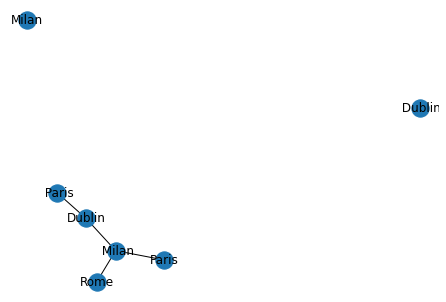

In [8]:
nx.draw(G, with_labels = True)

<b>Observe</b>: Order of the graph $G$:

In [9]:
len(G.nodes)
G.number_of_nodes()

7

<b>Observe</b>: Size of the graph $G$

In [10]:
G.number_of_edges()

4

<b>Observe</b>: Degree of nodes within the graph $G$.

In [11]:
G.degree()

DegreeView({'Paris': 1, 'Milan': 0, ' Dublin': 0, 'Rome': 1, ' Milan': 3, 'Dublin': 2, ' Paris': 1})

<b>Let</b> $G$ be a graph with nodes, $V$ and edges $E$

In [79]:
G = nx.Graph() 
V = {'Dublin', 'Paris', 'Milan', 'Rome'} 
E = [('Milan','Dublin'), ('Milan','Paris'), ('Paris','Dublin'), ('Milan','Rome')]
G.add_nodes_from(V)
G.add_edges_from(E)

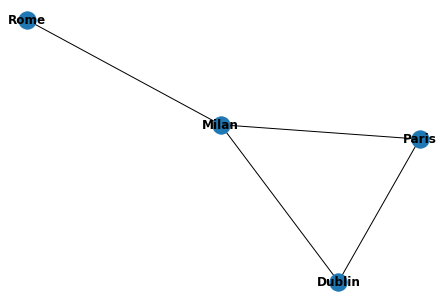

In [80]:
nx.draw(G, with_labels = True, font_weight = 'bold')

<b>Observe</b>: Ego-graph of $G$

In [12]:
print(nx.ego_graph(G, "Dublin").nodes)


['Dublin', ' Paris', ' Milan']


In [83]:
newNodes = {"London", "Madrid"}
newEdges = [("London", "Rome"), ("Madrid", "Paris")]

In [84]:
G.add_nodes_from(newNodes)
G.add_edges_from(newEdges)

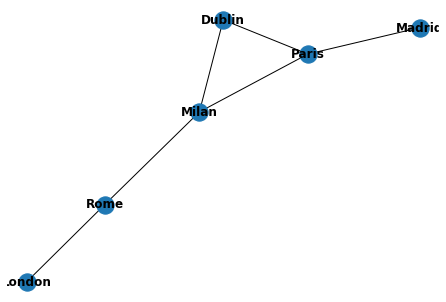

In [85]:
nx.draw(G, with_labels = True, font_weight = 'bold')

<b>Let</b> Let $G$ be a directed graph with nodes $V$ and edges $E$.

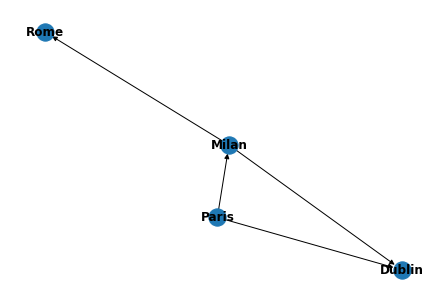

In [17]:
G = nx.DiGraph()
V = {'Dublin', 'Paris', 'Milan', "Rome"}
E = [("Milan", "Dublin"),("Paris", "Milan"),("Paris", "Dublin"),("Milan", "Rome")]
G.add_nodes_from(V)
G.add_edges_from(E)

nx.draw(G, with_labels = True, font_weight = 'bold')

<b>Let</b> $dmg$ and $umg$ be multi-graphs and multi-directed graphs which allow self loops and parallel edges.

In [27]:
dmg = nx.MultiDiGraph()
umg = nx.MultiGraph()

V = {'Dublin', 'Paris', 'Milan', 'Rome'}
E = [('Milan','Dublin', 19), ('Milan','Dublin', 8), ('Paris','Milan', 5), ('Paris','Dublin', 7), ('Milan','Rome', 55), ('Milan','Rome', 66), ('Milan','Milan', 66)]

dmg.add_nodes_from(V)
dmg.add_edges_from(E)

umg.add_nodes_from(V)
umg.add_edges_from(E)

[19, 8, 5, 7, 55, 66, 66]

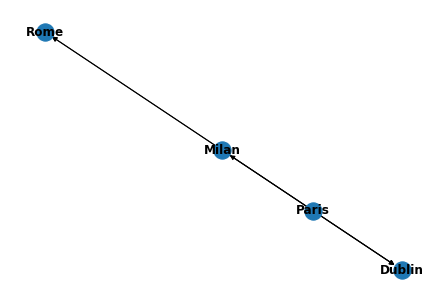

In [28]:
nx.draw(dmg, with_labels = True, font_weight = 'bold')

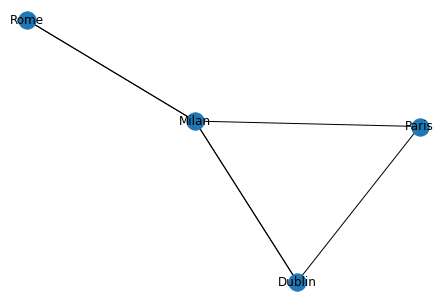

In [29]:
nx.draw(umg, with_labels = True)

<b>Observe</b> An adjacency matrix of $G$

In [26]:
nx.to_pandas_adjacency(G)

,Paris,Dublin,Milan,Rome
Paris,0.0,1.0,1.0,0.0
Dublin,0.0,0.0,0.0,0.0
Milan,0.0,1.0,0.0,1.0
Rome,0.0,0.0,0.0,0.0


In [95]:
nx.to_numpy_matrix(G)

matrix([[0., 0., 0., 0.],
        [1., 0., 1., 0.],
        [0., 0., 0., 0.],
        [1., 1., 0., 0.]])

<b>Observe</b> Edge List of $dmg$

In [30]:
# Edge list 
nx.to_pandas_edgelist(dmg)

,source,target
0,Paris,Milan
1,Paris,Dublin
2,Milan,Dublin
3,Milan,Dublin
4,Milan,Rome
5,Milan,Rome
6,Milan,Milan
